# Part-1

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [17]:
with tf.name_scope("Creation_of_array"):
    x_array=np.asarray([2.0,9.4,3.32,0.88,-2.23,1.11,0.57,-2.25,-3.31,6.45])
    y_array=np.asarray([1.22,0.34,-0.08,2.25,4.41,3.09,-6.66,-9.77,0.001,2.25])
    x = tf.constant(x_array,dtype = tf.float32,name = "x_array")
    y = tf.constant(y_array,dtype = tf.float32, name= "y_array")
with tf.name_scope("Calculating_y_mean"):
    mean_y = tf.reduce_mean(y, name = "mean_y")
    with tf.Session() as sess:
        result_y = sess.run(mean_y)
        print(result_y)
    

-0.2949


In [16]:
with tf.name_scope("Calculating_x_mean_and_x_variance"):
    mean_x, variance = tf.nn.moments(x, [0], name = "mean_x_and_variance_x")
    with tf.Session() as sess:
        m, v = sess.run([mean_x, variance])
        print(m)
        print(v)

1.594
14.2899


In [15]:
with tf.name_scope("Calculating_covariance"):
    def tensorflow_covariance(x_array,y_array,x_mean,y_mean):
        cov = 0.0
        for i in range(0,10):
            x_val = tf.subtract(x_array[i],x_mean, name="Finding_difference_of_xval_and_mean")
            y_val = tf.subtract(y_array[i],y_mean, name="Finding_difference_of_yval_and_mean")
            total_val = tf.multiply(x_val,y_val, name="Multiplying_found_values")
            cov = tf.add(cov,total_val, name="Recursive_addition")
        return cov/10.0
    with tf.Session() as sess:
        covar = sess.run(tensorflow_covariance(x,y,m,result_y))
        print(covar)

3.83422


In [14]:
with tf.name_scope("Calculating_slope_m_and_c"):
    slope = tf.div(covar,v,name="Finding_slope")
    intm = tf.multiply(slope,m,name = "Intermediate_step")
    c_intm = tf.subtract(result_y,intm,name = "Finding_c")

    with tf.Session() as sess:
        m_slope = sess.run(slope)
        c = sess.run(c_intm)
        print(m_slope)
        print(c)

0.268316
-0.722596


# Part-2: Plotting predicted values against actual values using NumPy

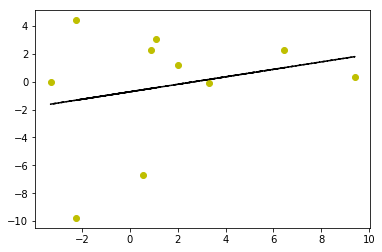

In [13]:
fit = np.polyfit(x_array,y_array,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x_array,y_array, 'yo', x_array, fit_fn(x_array), '--k',label='Original data')
plt.show()

### Root mean square error

In [18]:
with tf.name_scope("Finding_root_mean_square_error"):
    def rmse(predictions, targets):
        return np.sqrt(((predictions - targets) ** 2).mean())

    rmse_val = rmse(y_array, x_array)
    print("Root Mean Square error is: " + str(rmse_val))

Root Mean Square error is: 5.30626913189
